## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=9 (9NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 9-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 9NN model for the provided data set (refer to the video lectures 3.1.3 and 3.1.4 in 'Evaluating spatial models with spatial cross-validation' for help). Estimate the water permeability prediction performance (using 9NN model and C-index) with the following distance parameter values: d = 0, 20, 40, ..., 300 (that is, 20 meter intervals from 0m to 300m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 9-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.

- Plot of the graph C-index vs. distance parameter value.

### Import necessary libraries

In [80]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


### Read in the datasets

In [81]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).

input_df = pd.read_csv("input.csv")
output_df = pd.read_csv("output.csv")
coordinates_df = pd.read_csv("coordinates.csv")

In [82]:
input_df.describe()

,-5.319627000693968877e-02,-2.192960385319173422e-01,2.100203710608411767e-01,7.044248857837395184e-01,3.394767803718533039e-01,4.126382430764711229e-01,3.310743813668211577e-01,-3.441122815090714299e-02,-1.844805104342988333e-01,3.073453044043934490e-01,...,2.195409042303054503e-01,5.391189660033040010e-01,-6.452537679872522025e-01,-5.199176372857478023e-01,-4.470893658464750731e-01,5.540967867205053299e-01,8.728506609344185985e-02,-1.091932125630579592e-01,-9.136390741008875160e-01,-4.614792137924043081e-01
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,...,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000
mean,0.000031,0.000130,-0.000124,-0.000417,-0.000201,-0.000244,-0.000196,0.000020,0.000109,-0.000182,...,-0.000130,-0.000319,0.000382,0.000308,0.000265,-0.000328,-0.000052,0.000065,0.000541,0.000273
std,1.000591,1.000578,1.000579,1.000445,1.000558,1.000541,1.000559,1.000592,1.000582,1.000564,...,1.000578,1.000506,1.000469,1.000512,1.000533,1.000501,1.000590,1.000588,1.000345,1.000529
min,-0.857226,-0.832834,-1.860638,-2.210628,-2.474129,-1.404813,-1.233180,-0.034411,-0.410773,-1.161547,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-1.959513,-10.138692,-2.102563,-1.267980,-2.852354
25%,-0.857226,-0.832834,-0.798762,-0.522966,-0.536457,-0.625905,-0.920329,-0.034411,-0.324938,-0.627405,...,-0.414092,-0.877636,-0.645254,-0.519918,-0.447089,-0.712257,-0.159124,-0.689838,-0.734896,-0.525078
50%,-0.503453,-0.559609,-0.214730,-0.062694,0.047499,-0.236451,-0.138202,-0.034411,-0.285922,-0.360333,...,-0.414092,-0.169259,-0.645254,-0.519918,-0.447089,-0.373729,0.087285,0.054611,-0.200764,-0.086258
75%,0.643630,0.741873,0.811750,0.704425,0.737629,0.412638,0.643925,-0.034411,-0.090842,0.707952,...,0.219541,0.539119,0.269329,0.228921,-0.447089,0.396485,0.333694,0.565466,0.526788,0.282816
max,3.141484,3.363133,1.873626,2.392087,1.905540,3.398450,3.303158,29.060282,5.738152,4.981094,...,4.655539,4.790023,5.757647,3.973790,4.368376,4.252668,5.138671,6.368225,6.980403,12.954723


In [83]:
output_df.head()

,5.8359
0,6.2592
1,6.9041
2,6.2065
3,7.0642
4,6.8203


### Standardization of the predictor features (input.csv)

In [84]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 
scaler = StandardScaler()
scaler.fit(input_df)
input_scaled = scaler.transform(input_df)


In [85]:
input_scaled = pd.DataFrame(input_scaled)

In [86]:
coordinates_df.describe()

,4.5914e+05,7.5242e+06
count,1690.000000,1.690000e+03
mean,483889.928994,7.531418e+06
std,14250.807578,1.261216e+04
min,461590.000000,7.489200e+06
25%,466360.000000,7.527400e+06
50%,484770.000000,7.530200e+06
75%,495140.000000,7.538975e+06
max,515120.000000,7.556900e+06


### Functions and analysis code

In [87]:
# Include here all the functions and other relevant code that you need in order to implement the task.

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between 
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

In [88]:
# prepare the train and test sets

print(len(input_scaled))

1690


In [90]:
coordinates = coordinates_df.to_numpy()

In [116]:

# get the distances || assumption that the 3 datasets are all in the same order
dist_matrix = cdists(coordinates)

def SKCV(k=9, d=0):

    y_pred_all = []
    y_true_all = []
    
    for i in range(len(input_scaled)):

        distances_i = dist_matrix[i]

        # apply the spatial buffer to achieve SKCV using calculated distances from coordinates

        valid_idx = np.where(distances_i > d)[0] # return true cases of a boolean array

        # skip too far isolated points to avoid bad / invalid predictions
        if len(valid_idx) < k:
            continue


        # select the nearest (valid) points within k range to then use for knn (where k = 9)
        # --> spatial cross-validation

        nearest_idx = valid_idx[np.argsort(distances_i[valid_idx])[:k]]

        # select the train & test sets and return results through c-index
        
        X_train = input_scaled.iloc[nearest_idx]
        X_test = input_scaled.iloc[[i]]
    
        y_train = output_df.iloc[nearest_idx, 0]
        y_test = output_df.loc[i].item()
    
        model = KNeighborsRegressor(k)
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)[0]
    
        y_pred_all.append(y_pred)
    
        y_true_all.append(y_test)
        
    
    
    return (
        cindex(y_true_all, y_pred_all), 
    )

### Results for spatial leave-one-out cross-validation with 9-nearest neighbor regression model

In [117]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 9-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

c_indexes = []
dists = []

for d in range(0, 301, 20):
    
    c_index = SKCV(9, d)
    c_indexes.append(c_index)
    dists.append(d)



for index in c_indexes:
    print(index)

(0.7499102993199567,)
(0.7424987806313806,)
(0.7380571953961126,)
(0.7342687432374096,)
(0.7305997751876706,)
(0.7274549954869345,)
(0.6852017704671723,)
(0.6734047294683553,)
(0.6689578883338659,)
(0.6672017172073936,)
(0.6695984072523,)
(0.658034728178908,)
(0.655266270862416,)
(0.6560518525993575,)
(0.6538471780726688,)
(0.6522735618458158,)


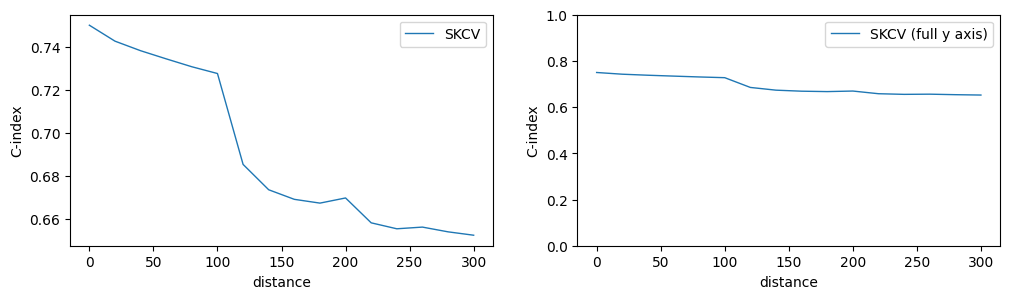

In [120]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,3))

c_indexes_flat = [ci[0] for ci in c_indexes]

sns.lineplot(
    ax=axes[0],
    x=dists,
    y=c_indexes_flat,
    linewidth=1,
    label="SKCV"
)

sns.lineplot(
    ax=axes[1],
    x=dists,
    y=c_indexes_flat,
    linewidth=1,
    label="SKCV (full y axis)"
)

axes[1].set_ylim(0, 1)
for ax in axes:
    ax.set_xlabel("distance")
    ax.set_ylabel("C-index")



## Analysis of the results

### In this cell, you need to answer the client's questions:


1. What happens to the 9NN performance as the prediction distance increases?

The precision of the model according to the c-index drops sharply at distance of around 100 meters, however the drop is not that significant (only around 0.04) as can be seen in figure 2 which puts it into perspective. Overall the dropoff is around 0.08 - 0.1 from 0 to 300 meters.


3. Do you think the results behave as was somewhat expected? Do they make sense, why?

It is expected that the model will perform better on lower prediction distance as the datapoints will share more featues with one another due to spatial autocorrelation.


5. If we require that the 9NN must have at least C-index performance of 0.68, then up to what distance should we trust the 9NN predictions, based on the results?

The cutoff point with the current iteration of the model where it achieves a C-index of 0.68 is at around 120 meters.